In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib 
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("mushrooms.csv",sep=",",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8121,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8122,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8123,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [4]:
df.isnull().sum()

#Missing Attribute Values: 2480 of them (denoted by "?"), all for attribute #11.

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [5]:
tol_label = 0
for col in df.columns:
    print(col)
    print(df[col].unique())
    tol_label += len(df[col].unique())
    print()
#Following are the unique values in each Column
#we can observe that the values in column 11- Has '?' indicating null values 

0
['class' 'p' 'e']

1
['cap-shape' 'x' 'b' 's' 'f' 'k' 'c']

2
['cap-surface' 's' 'y' 'f' 'g']

3
['cap-color' 'n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

4
['bruises' 't' 'f']

5
['odor' 'p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

6
['gill-attachment' 'f' 'a']

7
['gill-spacing' 'c' 'w']

8
['gill-size' 'n' 'b']

9
['gill-color' 'k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

10
['stalk-shape' 'e' 't']

11
['stalk-root' 'e' 'c' 'b' 'r' '?']

12
['stalk-surface-above-ring' 's' 'f' 'k' 'y']

13
['stalk-surface-below-ring' 's' 'f' 'y' 'k']

14
['stalk-color-above-ring' 'w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

15
['stalk-color-below-ring' 'w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

16
['veil-type' 'p']

17
['veil-color' 'w' 'n' 'o' 'y']

18
['ring-number' 'o' 't' 'n']

19
['ring-type' 'p' 'e' 'l' 'f' 'n']

20
['spore-print-color' 'k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

21
['population' 's' 'n' 'a' 'v' 'y' 'c']

22
['habitat' 'u' 'g' 'm' 'd' 'p' 'w' 'l']



In [6]:
df[11].value_counts() # we have about 2480 row items with ?

b             3776
?             2480
e             1120
c              556
r              192
stalk-root       1
Name: 11, dtype: int64

In [7]:
df[df[11]=='?'][0].value_counts()

p    1760
e     720
Name: 0, dtype: int64

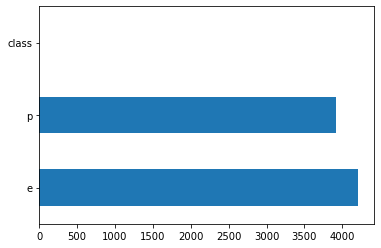

In [8]:
df[0].value_counts().plot(kind='barh')
#-- e(edible): 4208 (51.8%)
#-- p(poisonous): 3916 (48.2%)
#-- total: 8124 instances

In [9]:
y=df.iloc[:,:1]
x=df.iloc[:,1:]
y

,0
0,class
1,p
2,e
3,e
4,p
...,...
8120,e
8121,e
8122,e
8123,p


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y[0]=le.fit_transform(y[0])
y
#p=1,e=0

,0
0,0
1,2
2,1
3,1
4,2
...,...
8120,1
8121,1
8122,1
8123,2


In [13]:
x
#Now let us transform the data in x using label encoder 

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
2,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
3,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
4,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8121,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8122,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8123,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [14]:
x[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]] = x[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].apply(le.fit_transform)
x

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,2,0,2,0,6,2,1,1,3,1,...,3,7,7,1,2,2,5,6,3,2
1,6,3,5,2,7,1,0,2,5,0,...,2,8,8,0,3,1,4,2,4,6
2,6,3,10,2,0,1,0,0,5,0,...,2,8,8,0,3,1,4,3,2,1
3,0,3,9,2,3,1,0,0,6,0,...,2,8,8,0,3,1,4,3,2,4
4,6,4,9,2,7,1,0,2,6,0,...,2,8,8,0,3,1,4,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,4,3,5,1,5,0,0,0,12,0,...,2,5,5,0,1,1,4,0,1,3
8121,6,3,5,1,5,0,0,0,12,0,...,2,5,5,0,0,1,4,0,5,3
8122,3,3,5,1,5,0,0,0,6,0,...,2,5,5,0,1,1,4,0,1,3
8123,4,4,5,1,9,1,0,2,0,2,...,1,8,8,0,3,1,0,8,5,3


In [15]:
df_sam=pd.concat([y,x],axis=1,ignore_index=True)
df_sam

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,2,0,2,0,6,2,1,1,3,...,3,7,7,1,2,2,5,6,3,2
1,2,6,3,5,2,7,1,0,2,5,...,2,8,8,0,3,1,4,2,4,6
2,1,6,3,10,2,0,1,0,0,5,...,2,8,8,0,3,1,4,3,2,1
3,1,0,3,9,2,3,1,0,0,6,...,2,8,8,0,3,1,4,3,2,4
4,2,6,4,9,2,7,1,0,2,6,...,2,8,8,0,3,1,4,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,1,4,3,5,1,5,0,0,0,12,...,2,5,5,0,1,1,4,0,1,3
8121,1,6,3,5,1,5,0,0,0,12,...,2,5,5,0,0,1,4,0,5,3
8122,1,3,3,5,1,5,0,0,0,6,...,2,5,5,0,1,1,4,0,1,3
8123,2,4,4,5,1,9,1,0,2,0,...,1,8,8,0,3,1,0,8,5,3


In [16]:
df_sam.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,...,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000,8125.000000
mean,1.481846,4.291692,2.827323,5.478154,1.415385,4.318277,0.974277,0.323077,0.618462,5.493292,...,1.638769,6.366892,6.337354,0.000123,2.941785,1.143385,2.292308,3.902769,4.505477,1.856738
std,0.499947,1.732644,1.230197,2.594529,0.493068,2.374287,0.159093,0.736015,0.924343,3.925150,...,0.767123,2.273498,2.280230,0.011094,0.389021,0.528596,1.801812,2.823182,1.553930,2.150116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,4.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.000000,3.000000,1.000000,0.000000,2.000000,4.000000,0.000000
50%,1.000000,4.000000,3.000000,5.000000,1.000000,5.000000,1.000000,0.000000,0.000000,6.000000,...,2.000000,8.000000,8.000000,0.000000,3.000000,1.000000,2.000000,3.000000,5.000000,1.000000
75%,2.000000,6.000000,4.000000,9.000000,2.000000,5.000000,1.000000,0.000000,2.000000,8.000000,...,2.000000,8.000000,8.000000,0.000000,3.000000,1.000000,4.000000,8.000000,5.000000,3.000000
max,2.000000,6.000000,4.000000,10.000000,2.000000,9.000000,2.000000,2.000000,2.000000,12.000000,...,4.000000,9.000000,9.000000,1.000000,4.000000,3.000000,5.000000,9.000000,6.000000,7.000000


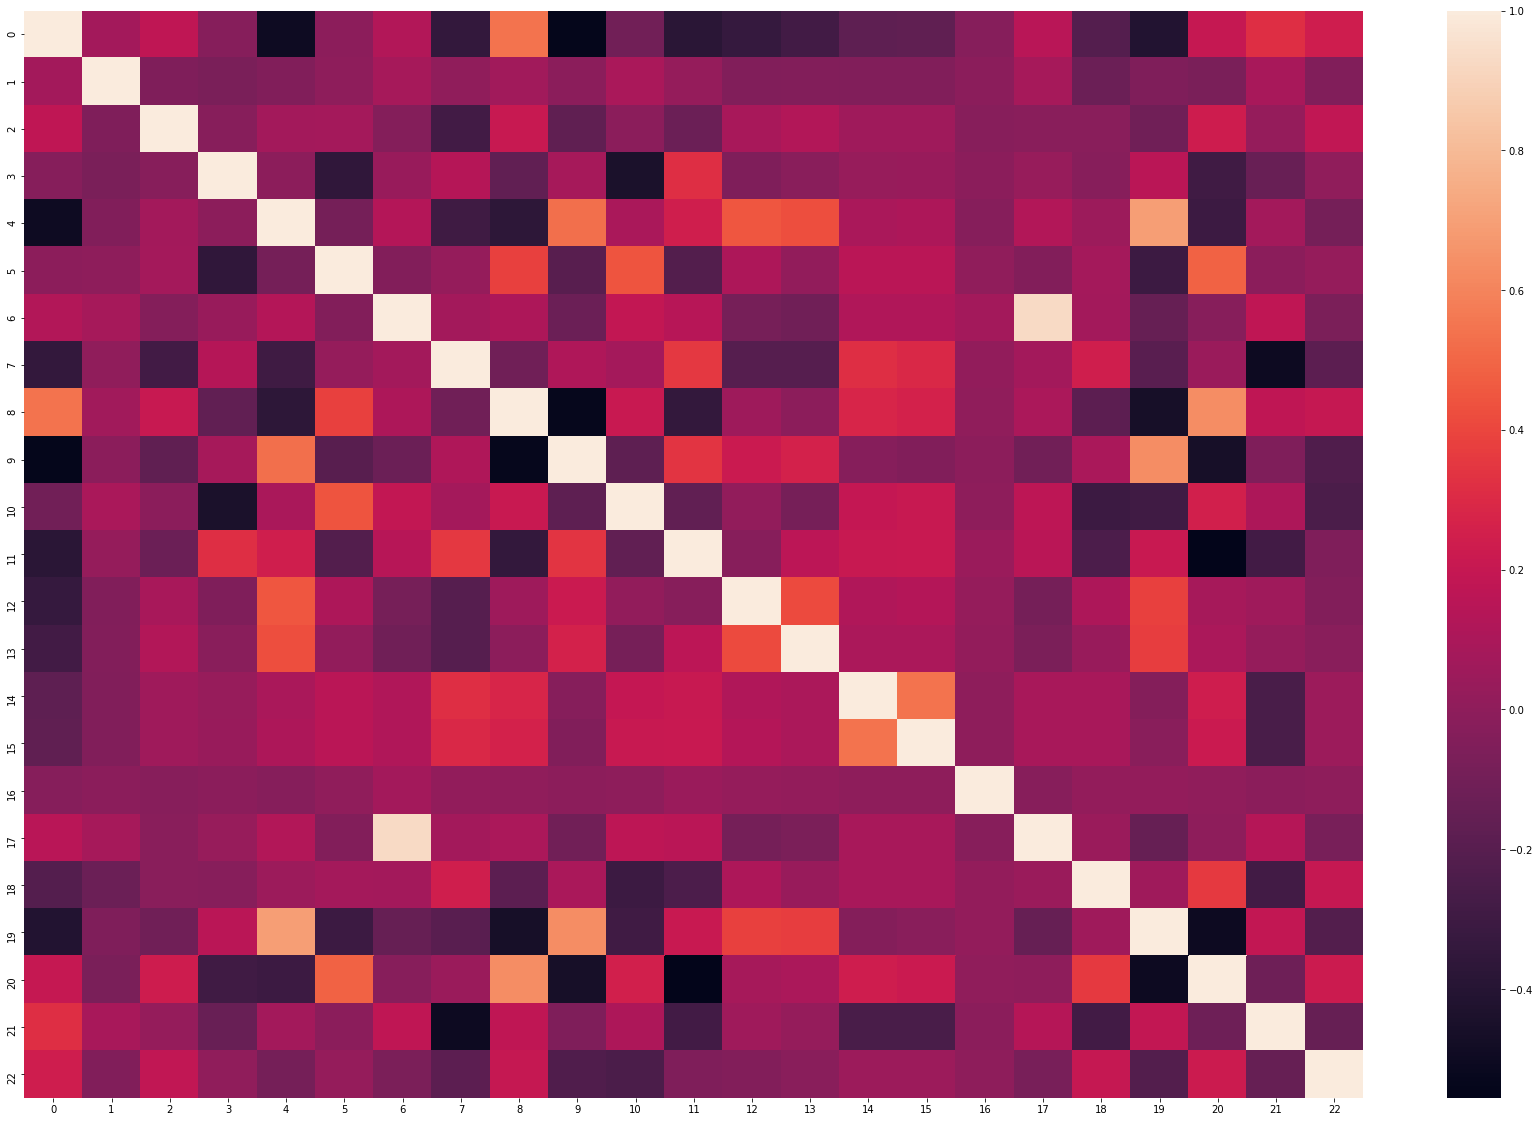

In [17]:
corr_hmap= df_sam.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_hmap,)
plt.show()
#As we can see there no impact of column '16' on the data so it can be dropped 

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)  
num_folds = 10
seed = 42
scoring = 'accuracy'

In [20]:
models= [
    ("SVC",SVC()),
    ("Logistic Regression",LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes",GaussianNB()),
    ("KNearest Neighbors",KNeighborsClassifier(5)),
    ]

In [21]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVC: 0.992308 (0.004865)
Logistic Regression: 0.944923 (0.007624)
Decision Tree: 0.999846 (0.000462)
Naive Bayes: 0.904769 (0.015965)
KNearest Neighbors: 0.999692 (0.000615)


Best perfoming mobel is DecsionTreeClassifier with 99.9% accuracy so we can go ahead with following model and cheak for the final results

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[858   0]
 [  0 767]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       858
           2       1.00      1.00      1.00       767

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [24]:
predictions

array([1, 1, 2, ..., 2, 1, 1], dtype=int64)

In [25]:
y_test

,0
1971,1
4663,1
5446,2
3332,2
8012,1
...,...
5120,2
1149,1
6496,2
7254,1


In [26]:
import joblib
joblib.dump(model,"MushroomProject.pkl")

['MushroomProject.pkl']